In [1]:
# -*- coding: utf-8 -*-
# Original Author: Mikhail Polyanskiy
# Last modified: 2017-04-02
# Original data: Rakić et al. 1998, https://doi.org/10.1364/AO.37.005271
# Author Khem  N poudel MTSU , May 28 2018

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz as w
π = np.pi

# Brendel-Bormann (BB) model parameters for Alumunium
ωp = 14.98 #eV
f0 = 0.526
Γ0 = 0.047 #eV

f1 = 0.213
Γ1 = 0.312 #eV
ω1 = 0.163 #eV
σ1 = 0.013 #eV

f2 = 0.060
Γ2 = 0.315 #eV
ω2 = 1.561 #eV
σ2 = 0.042 #eV

f3 = 0.182
Γ3 = 1.587 #eV
ω3 = 1.827 #eV
σ3 = 0.256 #eV

f4 = 0.014
Γ4 = 2.145 #eV
ω4 = 4.495 #eV
σ4 = 1.735 #eV

Ωp = f0**.5 * ωp  #eV

def BB(ω):  #ω: eV
    ε = 1-Ωp**2/(ω*(ω+1j*Γ0))

    α = (ω**2+1j*ω*Γ1)**.5
    za = (α-ω1)/(2**.5*σ1)
    zb = (α+ω1)/(2**.5*σ1)
    ε += 1j*π**.5*f1*ωp**2 / (2**1.5*α*σ1) * (w(za)+w(zb)) #χ1
    
    α = (ω**2+1j*ω*Γ2)**.5
    za = (α-ω2)/(2**.5*σ2)
    zb = (α+ω2)/(2**.5*σ2)
    ε += 1j*π**.5*f2*ωp**2 / (2**1.5*α*σ2) * (w(za)+w(zb)) #χ2
    
    α = (ω**2+1j*ω*Γ3)**.5
    za = (α-ω3)/(2**.5*σ3)
    zb = (α+ω3)/(2**.5*σ3)
    ε += 1j*π**.5*f3*ωp**2 / (2**1.5*α*σ3) * (w(za)+w(zb)) #χ3
    
    α = (ω**2+1j*ω*Γ4)**.5
    za = (α-ω4)/(2**.5*σ4)
    zb = (α+ω4)/(2**.5*σ4)
    ε += 1j*π**.5*f4*ωp**2 / (2**1.5*α*σ4) * (w(za)+w(zb)) #χ4
    
    return ε
  
ev_min=0.005
ev_max=20
npoints=200
eV = np.logspace(np.log10(ev_min), np.log10(ev_max), npoints)
μm = 4.13566733e-1*2.99792458/eV
ε = BB(eV)
n = (ε**.5).real
k = (ε**.5).imag


#============================   DATA OUTPUT   =================================
file = open('Al.txt', 'w')
for i in range(npoints-1, -1, -1):
    file.write('\n        {:.4e} {:.4e} {:.4e}'.format(μm[i],n[i],k[i]))
file.close()
    
    



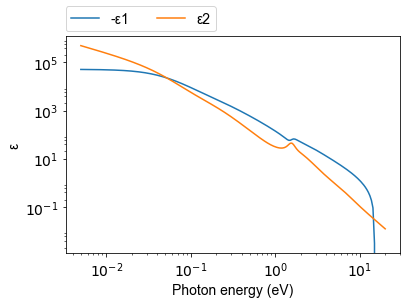

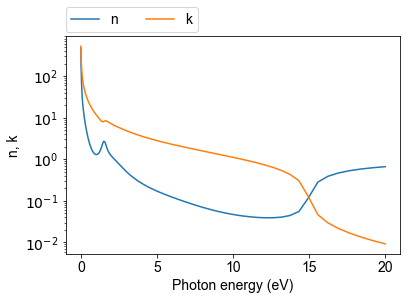

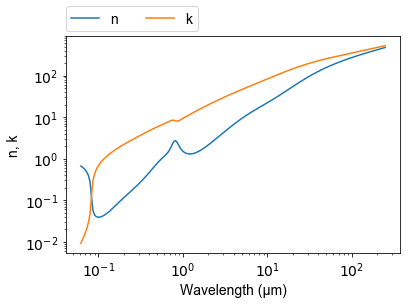

In [2]:
#===============================   PLOT   =====================================
plt.rc('font', family='Arial', size='14')

plt.figure(1)
plt.plot(eV, -ε.real, label="-ε1")
plt.plot(eV, ε.imag, label="ε2")
plt.xlabel('Photon energy (eV)')
plt.ylabel('ε')
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(0,1.02,1,0),loc=3,ncol=2,borderaxespad=0)
plt.show()

#plot n,k vs eV
plt.figure(2)
plt.plot(eV, n, label="n")
plt.plot(eV, k, label="k")
plt.xlabel('Photon energy (eV)')
plt.ylabel('n, k')
plt.yscale('log')
plt.legend(bbox_to_anchor=(0,1.02,1,0),loc=3,ncol=2,borderaxespad=0)
plt.show()

#plot n,k vs μm
plt.figure(3)
plt.plot(μm, n, label="n")
plt.plot(μm, k, label="k")
plt.xlabel('Wavelength (μm)')
plt.ylabel('n, k')
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(0,1.02,1,0),loc=3,ncol=2,borderaxespad=0)
plt.show()

In [3]:
np.linspace(0.0, 75.0, num=20)

array([  0.        ,   3.94736842,   7.89473684,  11.84210526,
        15.78947368,  19.73684211,  23.68421053,  27.63157895,
        31.57894737,  35.52631579,  39.47368421,  43.42105263,
        47.36842105,  51.31578947,  55.26315789,  59.21052632,
        63.15789474,  67.10526316,  71.05263158,  75.        ])

In [59]:
# -*- coding: utf-8 -*-
# Fresnel reflection calculator
# (see https://en.wikipedia.org/wiki/Fresnel_equations for equations)
# Author: Mikhail Polyanskiy
# Last modified: 2017-11-24

import numpy as np
RefSAvgAl=[]
RefPAvgAl=[]
θir=np.linspace(0.0, 60.0, num=3)#incidence angle (degrees)
for p in range(0,np.size(θir)):
    RefS=[]
    RefP=[]
########################## input parameters ###################################
    for ep in range(0,np.size(n)):
        
    
        n1 = 1.0              #complex ior of first medium (1 for vacuum)
        #n2 = 2.6332 + 3.3060j #complex ior of second medium
        n2 = n[ep]-k[ep]*1j #complex ior of second medium
       
    
                     
        #θi =np.linspace(2.0, 90.0, num=10)            #incidence angle (degrees)

        ###############################################################################

        θi = np.deg2rad(θir[p])              # incidence angle (radians)
        print(θi)
        θt = np.arcsin(n1/n2*np.sin(θi)) # refraction angle (radians)

        rs = (n1*np.cos(θi)-n2*np.cos(θt)) / (n1*np.cos(θi)+n2*np.cos(θt))
        rp = (n2*np.cos(θi)-n1*np.cos(θt)) / (n1*np.cos(θt)+n2*np.cos(θi))

        Rs = np.abs(rs)**2

        Rp = np.abs(rp)**2
        RefS.append(Rs)
        
        RefP.append(Rp)
  

 #Φs = np.rad2deg(np.angle(rs))
 #Φp = np.rad2deg(np.angle(rp))
    RefSAvg1= sum(RefS[141:156]) / len(RefS[141:156])
    RefPAvg1= sum(RefP[141:156]) / len(RefP[141:156])
    RefSAvgAl.append(RefSAvg1)
    RefPAvgAl.append(RefPAvg1)
    


TypeError: 'int' object is not subscriptable

In [ ]:
# -*- coding: utf-8 -*-
# Fresnel reflection calculator
# (see https://en.wikipedia.org/wiki/Fresnel_equations for equations)
# Author: Mikhail Polyanskiy
# Last modified: 2017-11-24

import numpy as np
RefSAvgAl=[]
RefPAvgAl=[]
θir=np.linspace(0.0, 60.0, num=3)#incidence angle (degrees)
for p in range(0,np.size(θir)):
    RefS=[]
    RefP=[]
########################## input parameters ###################################
    for ep in range(0,np.size(n)):
        
    
        n1 = 1.0              #complex ior of first medium (1 for vacuum)
        #n2 = 2.6332 + 3.3060j #complex ior of second medium
        n2 = n[ep]-k[ep]*1j #complex ior of second medium
       
    
                     
        #θi =np.linspace(2.0, 90.0, num=10)            #incidence angle (degrees)

        ###############################################################################

        θi = np.deg2rad(θir[p])              # incidence angle (radians)
        print(θi)
        θt = np.arcsin(n1/n2*np.sin(θi)) # refraction angle (radians)

        rs = (n1*np.cos(θi)-n2*np.cos(θt)) / (n1*np.cos(θi)+n2*np.cos(θt))
        rp = (n2*np.cos(θi)-n1*np.cos(θt)) / (n1*np.cos(θt)+n2*np.cos(θi))

        Rs = np.abs(rs)**2

        Rp = np.abs(rp)**2
        RefS.append(Rs)
        
        RefP.append(Rp)
  

 #Φs = np.rad2deg(np.angle(rs))
 #Φp = np.rad2deg(np.angle(rp))
    RefSAvg1= sum(RefS[141:156]) / len(RefS[141:156])
    RefPAvg1= sum(RefP[141:156]) / len(RefP[141:156])
    RefSAvgAl.append(RefSAvg1)
    RefPAvgAl.append(RefPAvg1)
    


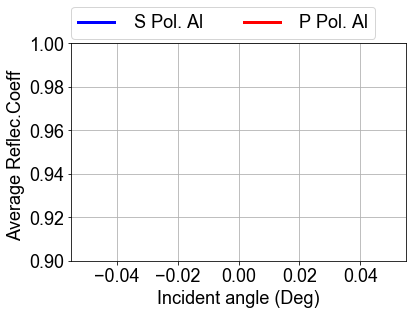

In [57]:
plt.figure(6)

plt.plot(θiRange[0:30],RefSAvgAl,'b',linewidth=3.0, label=" S Pol. Al ")
plt.plot(θiRange[0:30],RefPAvgAl,'r',linewidth=3.0, label=" P Pol. Al")

plt.xlabel('Incident angle (Deg)')
plt.ylabel('Average Reflec.Coeff ')
plt.ylim((0.90, 1))
plt.grid(True)
#plt.xscale('log')
#plt.yscale('log')
plt.legend(bbox_to_anchor=(0,1.02,1,0),loc=3,ncol=2,borderaxespad=0)
plt.show()

In [41]:
RefS1=[]
RefP1=[]
########################## input parameters ###################################
for ep in range(0,np.size(n)):
    
    n1 = 1.0              #complex ior of first medium (1 for vacuum)
    #n2 = 2.6332 + 3.3060j #complex ior of second medium
    n2 = n[ep]-k[ep]*1j #complex ior of second medium
    θi = 30.0             #incidence angle (degrees)
    #θi =np.linspace(2.0, 90.0, num=10)            #incidence angle (degrees)

    ###############################################################################

    θi = np.deg2rad(θi)              # incidence angle (radians)
    θt = np.arcsin(n1/n2*np.sin(θi)) # refraction angle (radians)

    rs = (n1*np.cos(θi)-n2*np.cos(θt)) / (n1*np.cos(θi)+n2*np.cos(θt))
    rp = (n2*np.cos(θi)-n1*np.cos(θt)) / (n1*np.cos(θt)+n2*np.cos(θi))

    Rs1 = np.abs(rs)**2
    
    Rp1 = np.abs(rp)**2
    RefS1.append(Rs1)
    RefP1.append(Rp1)
sum(RefP1[141:156]) / len(RefP1[141:156])


0.95646500323930894

In [6]:
RefS2=[]
RefP2=[]
########################## input parameters ###################################
for ep in range(0,np.size(n)):
    
    n1 = 1.0              #complex ior of first medium (1 for vacuum)
    #n2 = 2.6332 + 3.3060j #complex ior of second medium
    n2 = n[ep]-k[ep]*1j #complex ior of second medium
    θi = 60.0             #incidence angle (degrees)
    #θi =np.linspace(2.0, 90.0, num=10)            #incidence angle (degrees)

    ###############################################################################

    θi = np.deg2rad(θi)              # incidence angle (radians)
    θt = np.arcsin(n1/n2*np.sin(θi)) # refraction angle (radians)

    rs = (n1*np.cos(θi)-n2*np.cos(θt)) / (n1*np.cos(θi)+n2*np.cos(θt))
    rp = (n2*np.cos(θi)-n1*np.cos(θt)) / (n1*np.cos(θt)+n2*np.cos(θi))

    Rs1 = np.abs(rs)**2
    
    Rp1 = np.abs(rp)**2
    RefS2.append(Rs1)
    RefP2.append(Rp1)
sum(RefP2[141:156]) / len(RefP2[141:156])

0.8466100302016315

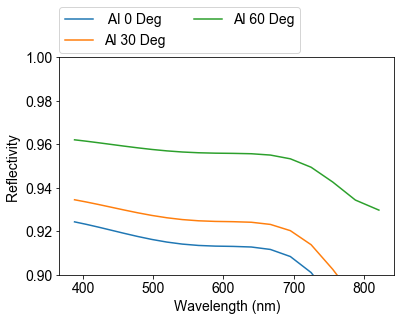

In [7]:

plt.figure(3)
plt.plot(μm[137:156]*1000,RefS[137:156], label=" Al 0 Deg")
plt.plot(μm[137:156]*1000,RefS1[137:156], label="Al 30 Deg")
plt.plot(μm[137:156]*1000,RefS2[137:156], label="Al 60 Deg")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectivity ')
plt.ylim((0.90, 1))
#plt.xscale('log')
#plt.yscale('log')
plt.legend(bbox_to_anchor=(0,1.02,1,0),loc=3,ncol=2,borderaxespad=0)
plt.show()


In [8]:
# Brendel-Bormann (BB) model parameters for Silver Ag
ωp = 14.98 #eV
f0 = 0.821
Γ0 = 0.049 #eV

f1 = 0.050
Γ1 = 0.189 #eV
ω1 = 2.025 #eV
σ1 = 1.894 #eV

f2 = 0.133
Γ2 = 0.067 #eV
ω2 = 5.185 #eV
σ2 = 0.665 #eV

f3 = 0.051
Γ3 = 0.019 #eV
ω3 = 4.343 #eV
σ3 = 0.189 #eV

f4 = 0.467
Γ4 = 0.117 #eV
ω4 = 9.809 #eV
σ4 = 1.170 #eV

f5 = 4.0
Γ5 = 0.052 #eV
ω5 = 18.56 #eV
σ5 = 0.516 #eV

Ωp = f0**.5 * ωp  #eV

def BB(ω):  #ω: eV
    ε = 1-Ωp**2/(ω*(ω+1j*Γ0))

    α = (ω**2+1j*ω*Γ1)**.5
    za = (α-ω1)/(2**.5*σ1)
    zb = (α+ω1)/(2**.5*σ1)
    ε += 1j*π**.5*f1*ωp**2 / (2**1.5*α*σ1) * (w(za)+w(zb)) #χ1
    
    α = (ω**2+1j*ω*Γ2)**.5
    za = (α-ω2)/(2**.5*σ2)
    zb = (α+ω2)/(2**.5*σ2)
    ε += 1j*π**.5*f2*ωp**2 / (2**1.5*α*σ2) * (w(za)+w(zb)) #χ2
    
    α = (ω**2+1j*ω*Γ3)**.5
    za = (α-ω3)/(2**.5*σ3)
    zb = (α+ω3)/(2**.5*σ3)
    ε += 1j*π**.5*f3*ωp**2 / (2**1.5*α*σ3) * (w(za)+w(zb)) #χ3
    
    α = (ω**2+1j*ω*Γ4)**.5
    za = (α-ω4)/(2**.5*σ4)
    zb = (α+ω4)/(2**.5*σ4)
    ε += 1j*π**.5*f4*ωp**2 / (2**1.5*α*σ4) * (w(za)+w(zb)) #χ4
    
    α = (ω**2+1j*ω*Γ5)**.5
    za = (α-ω5)/(2**.5*σ5)
    zb = (α+ω5)/(2**.5*σ5)
    ε += 1j*π**.5*f5*ωp**2 / (2**1.5*α*σ5) * (w(za)+w(zb)) #χ5
    
    return ε
  
ev_min=0.005
ev_max=20
npoints=200
eV = np.logspace(np.log10(ev_min), np.log10(ev_max), npoints)
μm = 4.13566733e-1*2.99792458/eV
ε = BB(eV)
n = (ε**.5).real
k = (ε**.5).imag


#============================   DATA OUTPUT   =================================
file = open('Ag.txt', 'w')
for i in range(npoints-1, -1, -1):
    file.write('\n        {:.4e} {:.4e} {:.4e}'.format(μm[i],n[i],k[i]))
file.close()
    

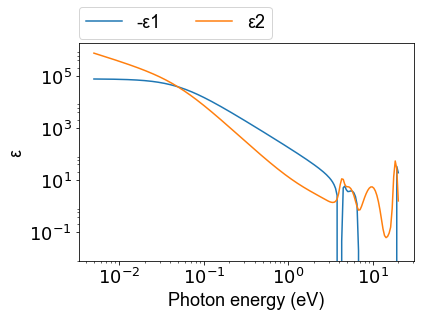

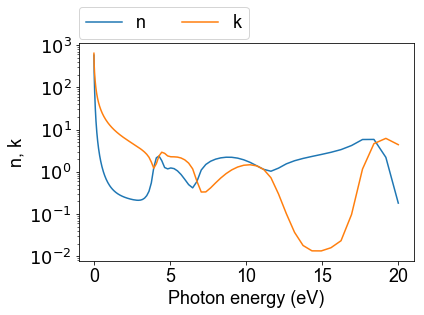

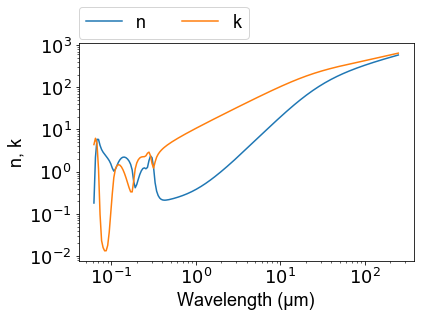

In [9]:
#===============================   PLOT   =====================================
plt.rc('font', family='Arial', size='18')

plt.figure(1)
plt.plot(eV, -ε.real, label="-ε1")
plt.plot(eV, ε.imag, label="ε2")
plt.xlabel('Photon energy (eV)')
plt.ylabel('ε')
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(0,1.02,1,0),loc=3,ncol=2,borderaxespad=0)
plt.show()

#plot n,k vs eV
plt.figure(2)
plt.plot(eV, n, label="n")
plt.plot(eV, k, label="k")
plt.xlabel('Photon energy (eV)')
plt.ylabel('n, k')
plt.yscale('log')
plt.legend(bbox_to_anchor=(0,1.02,1,0),loc=3,ncol=2,borderaxespad=0)
plt.show()

#plot n,k vs μm
plt.figure(3)
plt.plot(μm, n, label="n")
plt.plot(μm, k, label="k")
plt.xlabel('Wavelength (μm)')
plt.ylabel('n, k')
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(0,1.02,1,0),loc=3,ncol=2,borderaxespad=0)
plt.show()

In [21]:
import numpy as np
RefSAvgAg=[]
RefPAvgAg=[]
θiRange1=np.linspace(0.0, 60.0, num=29)#incidence angle (degrees)
for θi in range(0,np.size(θiRange1)):
    RefSAg=[]
    RefPAg=[]
########################## input parameters ###################################
    for ep in range(0,np.size(n)):
        
    
        n1 = 1.0              #complex ior of first medium (1 for vacuum)
        #n2 = 2.6332 + 3.3060j #complex ior of second medium
        n2 = n[ep]-k[ep]*1j #complex ior of second medium
    
                     
        #θi =np.linspace(2.0, 90.0, num=10)            #incidence angle (degrees)

        ###############################################################################

        θi = np.deg2rad(θi)              # incidence angle (radians)
        θt = np.arcsin(n1/n2*np.sin(θi)) # refraction angle (radians)

        rs = (n1*np.cos(θi)-n2*np.cos(θt)) / (n1*np.cos(θi)+n2*np.cos(θt))
        rp = (n2*np.cos(θi)-n1*np.cos(θt)) / (n1*np.cos(θt)+n2*np.cos(θi))

        Rs = np.abs(rs)**2

        Rp = np.abs(rp)**2
        RefSAg.append(Rs)
        RefPAg.append(Rp)
  

 #Φs = np.rad2deg(np.angle(rs))
 #Φp = np.rad2deg(np.angle(rp))
    RefSAgAvg1= sum(RefSAg[141:156]) / len(RefS[141:156])
    RefPAgAvg1= sum(RefPAg[141:156]) / len(RefP[141:156])
    RefSAvgAg.append(RefSAgAvg1)
    RefPAvgAg.append(RefPAgAvg1)
    
RefPAvgAg

/home/vijay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars
/home/vijay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in double_scalars


[inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf]

In [17]:
# -*- coding: utf-8 -*-
# Fresnel reflection calculator
# (see https://en.wikipedia.org/wiki/Fresnel_equations for equations)
# Author: Mikhail Polyanskiy
# Last modified: 2017-11-24

import numpy as np
RefSAg=[]
RefPAg=[]
########################## input parameters ###################################
for ep in range(0,np.size(n)):
    
    n1 = 1.0              #complex ior of first medium (1 for vacuum)
    #n2 = 2.6332 + 3.3060j #complex ior of second medium
    n2 = n[ep]-k[ep]*1j #complex ior of second medium
    θi = 0.0             #incidence angle (degrees)
    #θi =np.linspace(2.0, 90.0, num=10)            #incidence angle (degrees)

    ###############################################################################

    θi = np.deg2rad(θi)              # incidence angle (radians)
    θt = np.arcsin(n1/n2*np.sin(θi)) # refraction angle (radians)

    rs = (n1*np.cos(θi)-n2*np.cos(θt)) / (n1*np.cos(θi)+n2*np.cos(θt))
    rp = (n2*np.cos(θi)-n1*np.cos(θt)) / (n1*np.cos(θt)+n2*np.cos(θi))

    RsAg = np.abs(rs)**2
    
    RpAg = np.abs(rp)**2
    RefSAg.append(RsAg)
    RefPAg.append(RpAg)
sum(RefPAg[141:156]) / len(RefPAg[141:156])

0.96224255951630033

In [18]:
import numpy as np
RefSAg1=[]
RefPAg1=[]
########################## input parameters ###################################
for ep in range(0,np.size(n)):
    
    n1 = 1.0              #complex ior of first medium (1 for vacuum)
    #n2 = 2.6332 + 3.3060j #complex ior of second medium
    n2 = n[ep]-k[ep]*1j #complex ior of second medium
    θi = 30.0             #incidence angle (degrees)
    #θi =np.linspace(2.0, 90.0, num=10)            #incidence angle (degrees)

    ###############################################################################

    θi = np.deg2rad(θi)              # incidence angle (radians)
    θt = np.arcsin(n1/n2*np.sin(θi)) # refraction angle (radians)

    rs = (n1*np.cos(θi)-n2*np.cos(θt)) / (n1*np.cos(θi)+n2*np.cos(θt))
    rp = (n2*np.cos(θi)-n1*np.cos(θt)) / (n1*np.cos(θt)+n2*np.cos(θi))

    RsAg1 = np.abs(rs)**2
    
    RpAg1 = np.abs(rp)**2
    RefSAg1.append(RsAg1)
    RefPAg1.append(RpAg1)
sum(RefPAg1[141:156]) / len(RefPAg1[141:156])

0.95646500323930894

In [ ]:
RefSAg2=[]
RefPAg2=[]
########################## input parameters ###################################
for ep in range(0,np.size(n)):
    
    n1 = 1.0              #complex ior of first medium (1 for vacuum)
    #n2 = 2.6332 + 3.3060j #complex ior of second medium
    n2 = n[ep]-k[ep]*1j #complex ior of second medium
    θi = 60.0             #incidence angle (degrees)
    #θi =np.linspace(2.0, 90.0, num=10)            #incidence angle (degrees)

    ###############################################################################

    θi = np.deg2rad(θi)              # incidence angle (radians)
    θt = np.arcsin(n1/n2*np.sin(θi)) # refraction angle (radians)

    rs = (n1*np.cos(θi)-n2*np.cos(θt)) / (n1*np.cos(θi)+n2*np.cos(θt))
    rp = (n2*np.cos(θi)-n1*np.cos(θt)) / (n1*np.cos(θt)+n2*np.cos(θi))

    RsAg2 = np.abs(rs)**2
    
    RpAg2 = np.abs(rp)**2
    RefSAg2.append(RsAg2)
    RefPAg2.append(RpAg2)
sum(RefPAg2[141:156]) / len(RefPAg2[141:156])

In [ ]:
plt.figure(4)

plt.plot(μm[137:156]*1000,RefSAg[137:156],'r--', label=" Ag 0 Deg")
plt.plot(μm[137:156]*1000,RefSAg1[137:156],'r*', label="Ag 30 Deg")
plt.plot(μm[137:156]*1000,RefSAg2[137:156],'r', label="Ag 60 Deg")
plt.plot(μm[137:156]*1000,RefS[137:156],'b--', label=" Al 0 Deg")
plt.plot(μm[137:156]*1000,RefS1[137:156],'b*', label="Al 30 Deg")
plt.plot(μm[137:156]*1000,RefS2[137:156],'b', label="Al 60 Deg")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectivity ')
plt.ylim((0.70, 1))
plt.grid(True)
#plt.xscale('log')
#plt.yscale('log')
plt.legend(bbox_to_anchor=(0,1.02,1,0),loc=3,ncol=2,borderaxespad=0)
plt.show()
RefS1[141:156]


In [ ]:
plt.figure(4)

plt.plot(μm[137:156]*1000,RefPAg[137:156],'r--', label=" Ag 0 Deg")
plt.plot(μm[137:156]*1000,RefPAg1[137:156],'r*', label="Ag 30 Deg")
plt.plot(μm[137:156]*1000,RefPAg2[137:156],'r', label="Ag 60 Deg")
plt.plot(μm[137:156]*1000,RefP[137:156],'b--', label=" Al 0 Deg")
plt.plot(μm[137:156]*1000,RefP1[137:156],'b*', label="Al 30 Deg")
plt.plot(μm[137:156]*1000,RefP2[137:156],'b', label="Al 60 Deg")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectivity ')
plt.ylim((0.70, 1))
plt.grid(True)
#plt.xscale('log')
#plt.yscale('log')
plt.legend(bbox_to_anchor=(0,1.02,1,0),loc=3,ncol=2,borderaxespad=0)
plt.show()
RefS1[141:156]
